In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import precision_score,recall_score,accuracy_score

In [5]:
data = pd.read_csv("garments_worker_productivity.csv")

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [7]:
# correct department name typo
data['department'] = data['department'].str.replace('sweing', 'sewing', case=False)

# corect two department values of "finishing"
data['department'] = data['department'].str.strip().str.lower()

In [8]:
# Filter for outliers in each column using logical operators
actual_outliers = data[(data['actual_productivity'] < 0) | (data['actual_productivity'] > 1)].shape[0]
targeted_outliers = data[(data['targeted_productivity'] < 0) | (data['targeted_productivity'] > 1)].shape[0]

print("Actual productivity column has:", actual_outliers, "values ​​outside the range 0-1.")
print("targeted_productivity column has:", targeted_outliers, "values ​​outside the range 0-1.")

Actual productivity column has: 37 values ​​outside the range 0-1.
targeted_productivity column has: 0 values ​​outside the range 0-1.


In [9]:
# filter out rows where actual target & overall productivity is above 1 or below 0
data = data[(data['actual_productivity'] >= 0) & (data['actual_productivity'] <= 1)]
data = data[(data['targeted_productivity'] >= 0) & (data['targeted_productivity'] <= 1)]

In [ ]:
# Filter for outliers in each column using logical operators
actual_outliers = data[(data['actual_productivity'] < 0) | (data['actual_productivity'] > 1)].shape[0]
targeted_outliers = data[(data['targeted_productivity'] < 0) | (data['targeted_productivity'] > 1)].shape[0]

print("Actual productivity column has:", actual_outliers, "values ​​outside the range 0-1.")
print("targeted_productivity column has:", targeted_outliers, "values ​​outside the range 0-1.")

Actual productivity column has: 0 values ​​outside the range 0-1.
targeted_productivity column has: 0 values ​​outside the range 0-1.


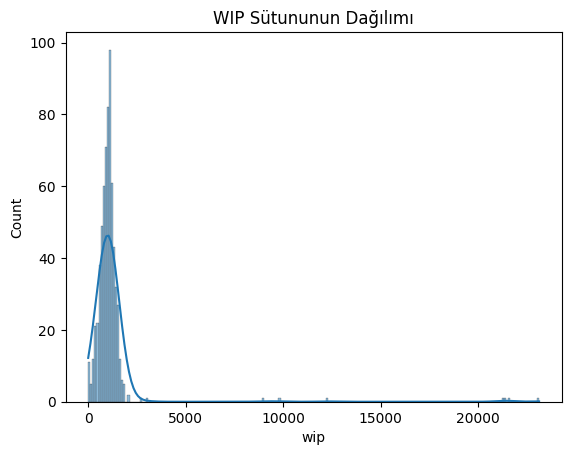

In [ ]:
sns.histplot(data['wip'], kde=True)
plt.title('WIP Sütununun Dağılımı')
plt.show()

* **We have NaN values in wip column. We have to fix this problem. Because nan values ​​​​negatively affect our analysis and models**

* **As we can see from the histogram graph, our Wip data is skewed to the right. Since it is not a symmetric distribution, we can fill in our NaN values ​​with the median.**

In [10]:
# missing values in 'wip' replaced by the median of the column
data['wip'] = data['wip'].fillna(data['wip'].median())

In [11]:
def detaileddatatable(df):
    new_table = pd.DataFrame(index=df.columns)

    # We analyze each column of the DataFrame and add the necessary information    new_table['Data_Type'] = df.dtypes
    new_table["Non_missing_values"] = df.count()
    new_table["Unique_values"] = df.nunique()
    new_table["Nan_Val"] = df.isnull().sum()

    return new_table

In [ ]:
detaileddatatable(data)

,Non_missing_values,Unique_values,Nan_Val
date,1160,59,0
quarter,1160,5,0
department,1160,2,0
day,1160,6,0
team,1160,12,0
targeted_productivity,1160,9,0
smv,1160,70,0
wip,1160,532,0
over_time,1160,143,0
incentive,1160,46,0


* We can see that, we have 15 columns. 11 of them are numerical and 4 of them categorical(object type)
* No null values ​​in any column

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1160.0,6.544828,3.422968,1.000000,4.000000,7.000000,9.000000,12.000000
targeted_productivity,1160.0,0.727905,0.098735,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1160.0,15.014810,11.004750,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1160.0,1103.984483,1341.653443,7.000000,962.750000,1028.500000,1070.500000,23122.000000
over_time,1160.0,4575.301724,3363.475857,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1160.0,37.012931,162.300882,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1160.0,0.753448,12.910356,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1160.0,0.381034,3.320081,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1160.0,0.155172,0.433766,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1160.0,34.346552,22.181174,2.000000,9.000000,34.000000,57.000000,89.000000


In [12]:
# 'date' to datetime format standardization
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [ ]:
data.describe(include=['O']).T

,count,unique,top,freq
quarter,1160,5,Quarter1,348
department,1160,2,sewing,666
day,1160,6,Wednesday,200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1160 non-null   datetime64[ns]
 1   quarter                1160 non-null   object        
 2   department             1160 non-null   object        
 3   day                    1160 non-null   object        
 4   team                   1160 non-null   int64         
 5   targeted_productivity  1160 non-null   float64       
 6   smv                    1160 non-null   float64       
 7   wip                    1160 non-null   float64       
 8   over_time              1160 non-null   int64         
 9   incentive              1160 non-null   int64         
 10  idle_time              1160 non-null   float64       
 11  idle_men               1160 non-null   int64         
 12  no_of_style_change     1160 non-null   int64         
 13  no_of_wo

In [ ]:
numerical_values = data.select_dtypes(include=['int64', 'float64'])
numerical_values

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,1028.5,960,0,0.0,0,0,8.0,0.628333
1193,8,0.70,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625
1194,7,0.65,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625
1195,9,0.75,2.90,1028.5,1800,0,0.0,0,0,15.0,0.505889


In [13]:
data['diff']= data['actual_productivity'] - data['targeted_productivity']
data['diff'].describe()

,diff
count,1160.000000
mean,-0.001914
std,0.156802
min,-0.561958
25%,-0.023394
50%,0.000431
75%,0.073319
max,0.644375


The purpose of taking this difference is to see the deviation between the actual and targeted productivity and to prepare the data for use in modeling this deviation.

The data['diff'] column represents the difference between the productivity target and the actual productivity, and the analysis of this difference is critical to identify improvement opportunities in the production process. This value can be an important indicator in future forecasts, analysis or performance evaluations.

---

1. mean: -0.001914
The mean value is -0.001914, meaning that the difference between actual productivity and targeted productivity is slightly negative on average. This generally indicates that productivity is falling short of target, but the difference is not very large. Since the mean difference is close to zero, it may indicate that there is no significant deviation from the productivity target.

2. min: -0.561958
The smallest difference is -0.561958. This indicates that in some cases, actual productivity is well behind target (around 56%). This indicates that productivity is seriously low in some production processes.

3. 25% (1st Quartile): -0.023394
It indicates that 25% of the data is below this value. That is, in the first quartile (low values), the difference between actual productivity and targeted productivity is negative and slightly below target with a small deviation on average.



> When we look at this data, we realize that our productivity is not at bad levels in general. We can focus on more specific analyses rather than general analyses. For example, we can focus on analyses such as how the productivity of teams has been observed in certain date ranges.



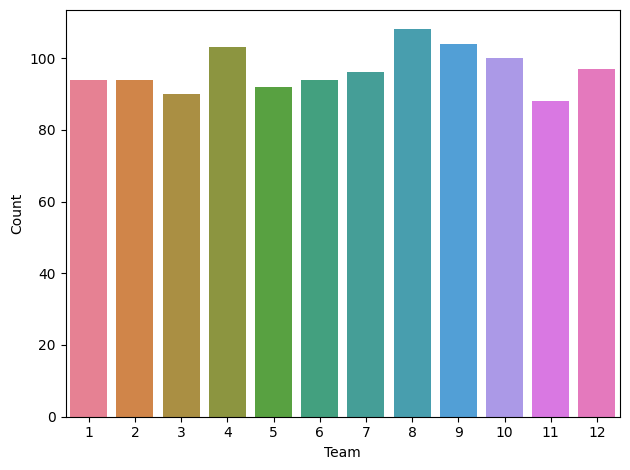

In [ ]:
team_counts = numerical_values['team'].value_counts().reset_index()
team_counts.columns = ['team', 'count']

sns.barplot(x='team', y='count', data=team_counts, hue='team', legend=False, palette=sns.color_palette("husl", len(team_counts)))

plt.xlabel('Team')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


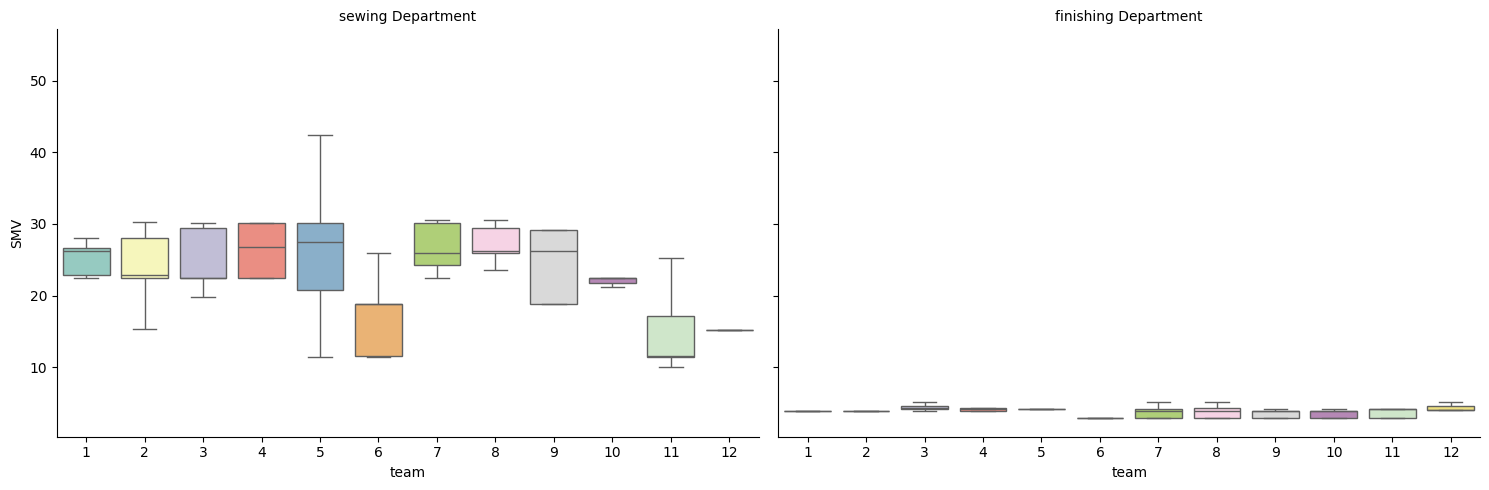

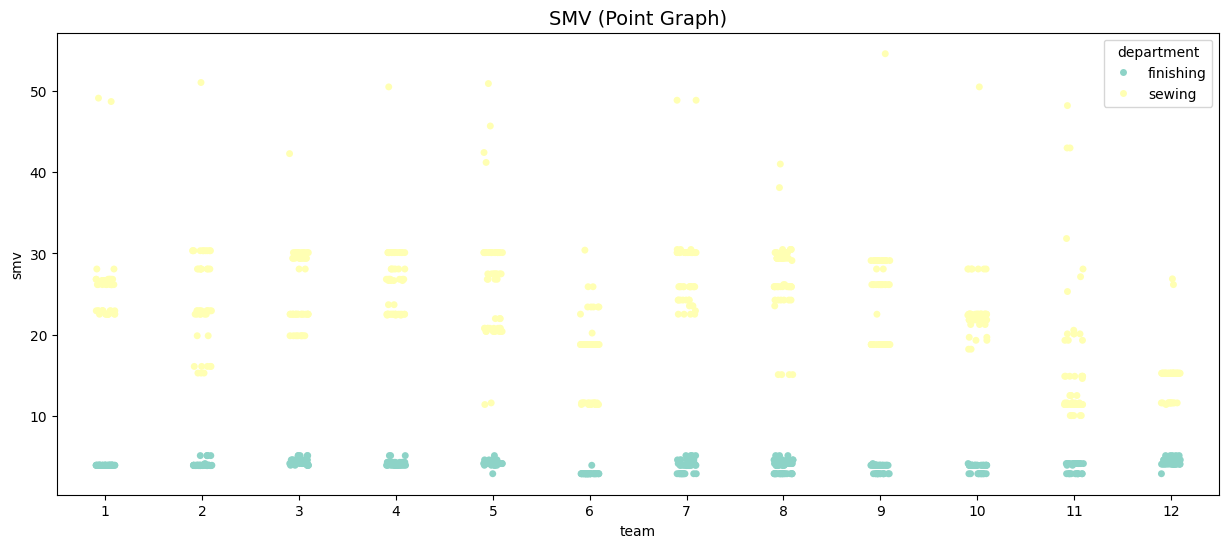

In [ ]:
g = sns.FacetGrid(data, col="department", height=5, aspect=1.5)
g.map(sns.boxplot, "team", "smv", palette="Set3", fliersize=0)
g.set_axis_labels("team", "SMV")
g.set_titles("{col_name} Department")
plt.show()

plt.figure(figsize=(15, 6))
sns.stripplot(x="team", y="smv", hue="department", data=data, palette="Set3", jitter=True)
plt.title('SMV (Point Graph)', fontsize=14)
plt.show()

## **As we have seen above, while the "Standard Minute Value" of the tools is in regular ranges when it comes to finishing, there are deviations in the Sewing values.**

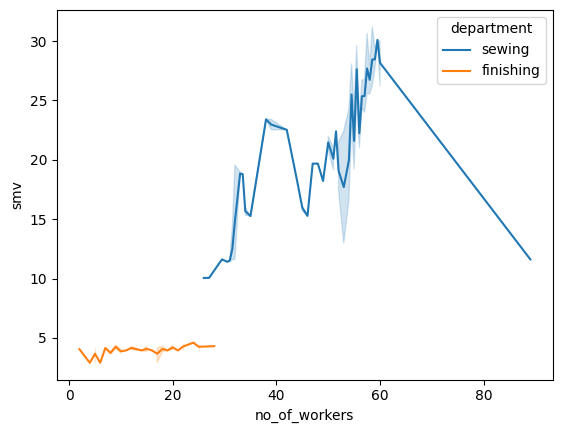

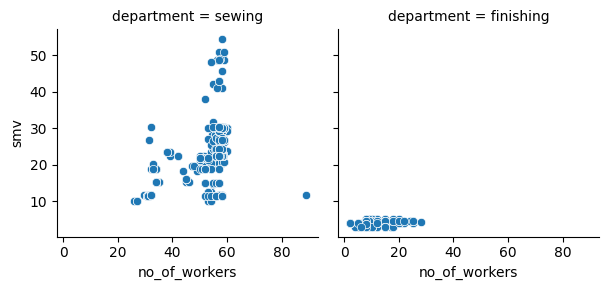

In [ ]:
sns.lineplot(data=data, x="no_of_workers", y="smv", hue="department")
g = sns.FacetGrid(data, col="department", col_wrap=3)
g.map(sns.scatterplot, "no_of_workers", "smv")





> * Sewing Department : In this department, an increasing trend in SMV values is observed as the number of workers increases. In other words, when there are more workers, the standard time required to complete the task is generally higher. This suggests that in the sewing department, the complexity or scale of the work might be related to the number of workers. The areas where the dots are more densely clustered (e.g., in the 40-60 workers range) indicate the most common worker counts and their corresponding SMV values in this department.


---


> * Finishing Department : In this department, the number of workers does not seem to have a significant effect on SMV. Dots are generally distributed horizontally at low SMV values, regardless of the number of workers. This indicates that in the finishing department, the time required to complete the task is more likely influenced by other factors (e.g., the equipment used, the nature of the process) rather than the number of workers.


---

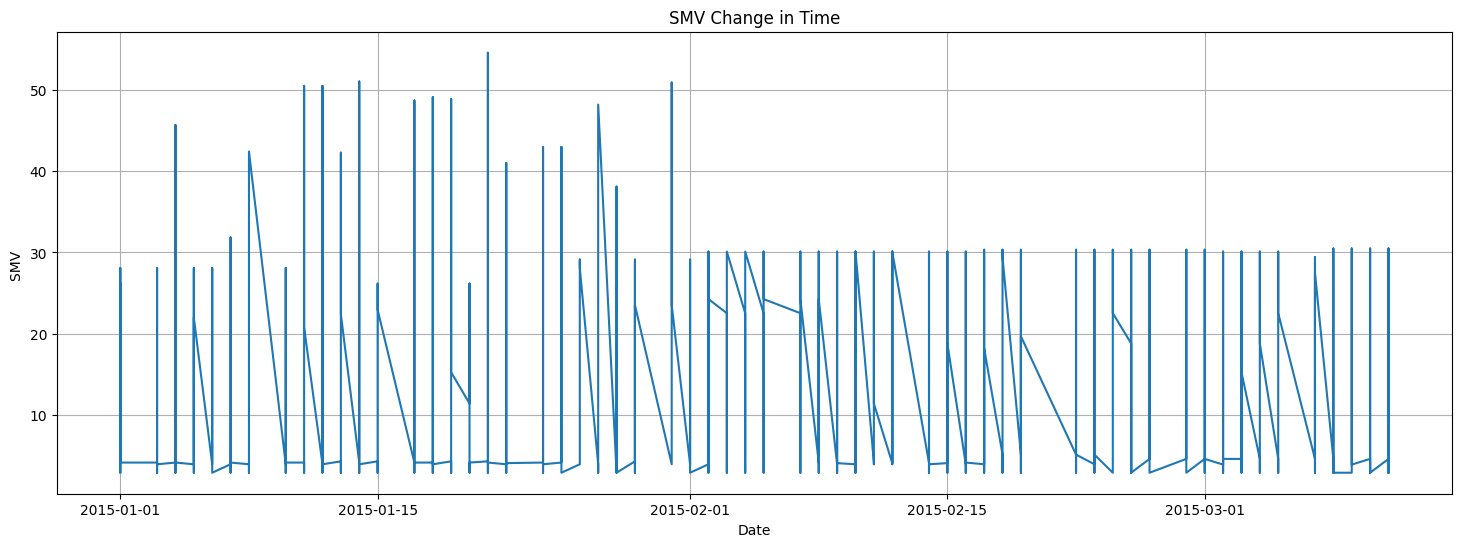

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(data.date, data.smv)
plt.xlabel("Date")
plt.ylabel("SMV ")
plt.title("SMV Change in Time")
plt.grid(True)
plt.show()

---

>We see that there is consistency after February 2015. We can try to find the factors that caused the fluctuations before this date and work to prevent these factors in the future.

---

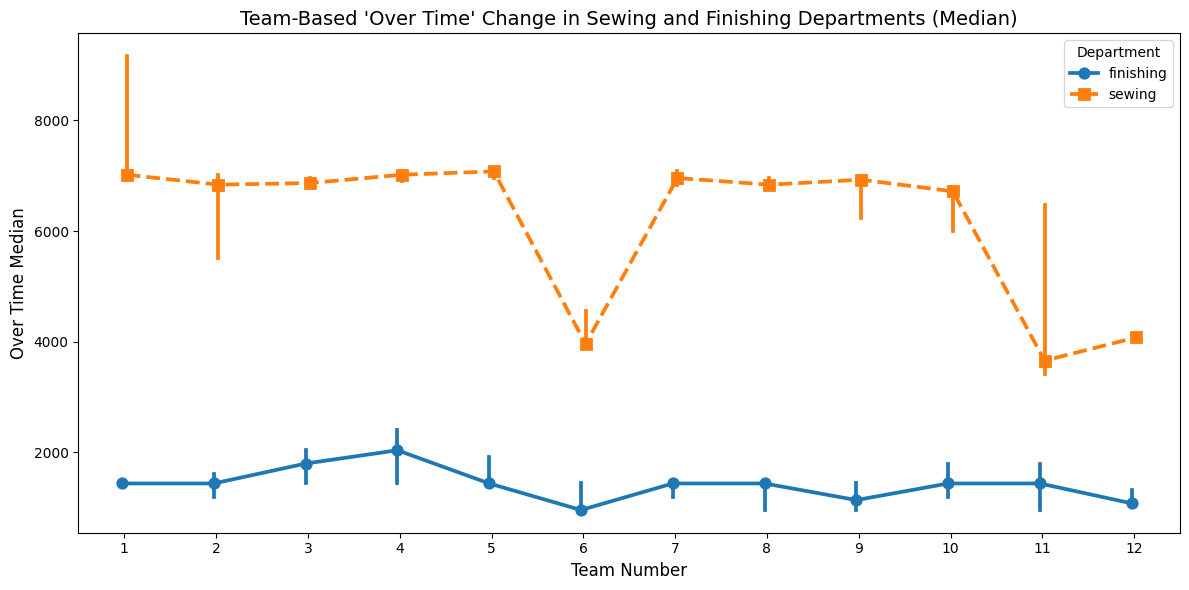

In [ ]:
# Grouping and visualizing related data
df_filtered = data[data['department'].isin(['sewing', 'finishing'])]

# Seaborn pointplot with median
plt.figure(figsize=(12, 6))
sns.pointplot(
    data=df_filtered,
    x='team',
    y='over_time',
    hue='department',
    dodge=True,
    markers=['o', 's'],
    linestyles=['-', '--'],
    estimator=np.median  # We use np.median for median calculation
)


title = "Team-Based 'Over Time' Change in Sewing and Finishing Departments (Median)"
plt.title(title, fontsize=14)
plt.xlabel('Team Number', fontsize=12)
plt.ylabel('Over Time Median', fontsize=12)
plt.legend(title='Department', fontsize=10)

plt.tight_layout()
plt.show()


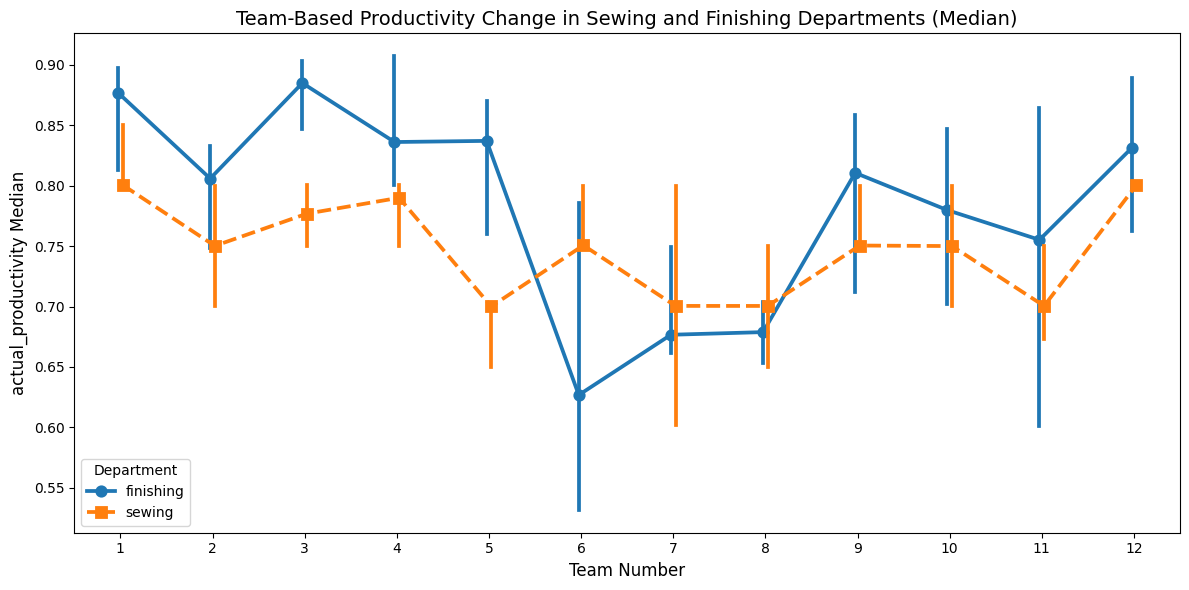

In [14]:
# Grouping and visualizing related data
df_filtered = data[data['department'].isin(['sewing', 'finishing'])]

# Seaborn pointplot with median
plt.figure(figsize=(12, 6))
sns.pointplot(
    data=df_filtered,
    x='team',
    y='actual_productivity',
    hue='department',
    dodge=True,
    markers=['o', 's'],
    linestyles=['-', '--'],
    estimator=np.median  # We use np.median for median calculation
)


title = "Team-Based Productivity Change in Sewing and Finishing Departments (Median)"
plt.title(title, fontsize=14)
plt.xlabel('Team Number', fontsize=12)
plt.ylabel('actual_productivity Median', fontsize=12)
plt.legend(title='Department', fontsize=10)

plt.tight_layout()
plt.show()

---
**Sewing Department: A significant drop in production is observed, especially in team 6, followed by a rapid recovery. This may indicate problems with work processes or resource utilization in some teams.**

---


> Identifying the Root Causes of the Performance Problem
To understand the cause of the decline, we can investigate the following topics:

* Machine and Equipment Status: Have there been any breakdowns or maintenance deficiencies?
* Personnel Status: Are there any problems such as a workforce shortage, inexperience or low morale in the team?
* Material Supply: Have there been any delays in the supply of raw materials or other materials?
* External Factors: For example, could external factors such as power outages or delivery delays have been effective?





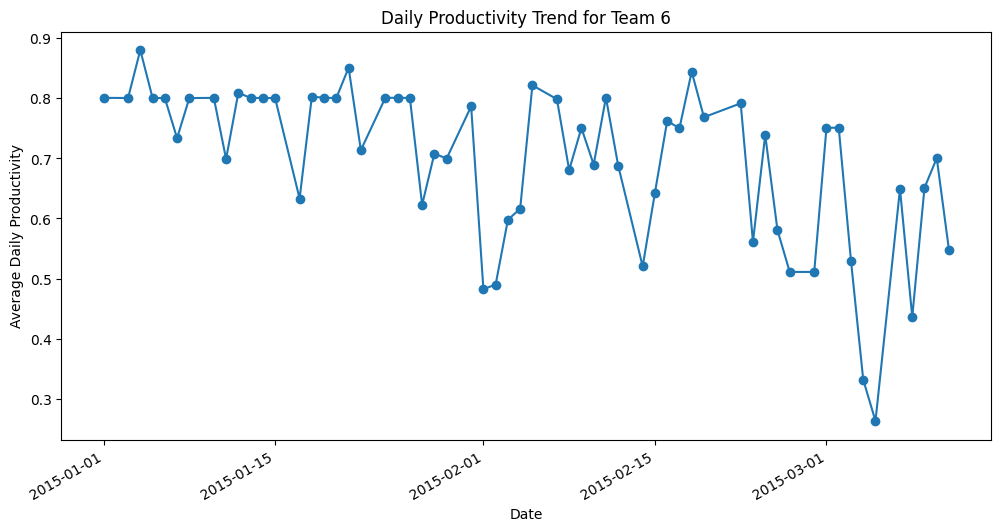

In [ ]:
# Filtering data for Team 6
team_6_data = data[data['team'] == 6]

team_6_data.groupby('date')['actual_productivity'].median().plot(
    kind='line', figsize=(12, 6), title="Daily Productivity Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Daily Productivity")
plt.show()

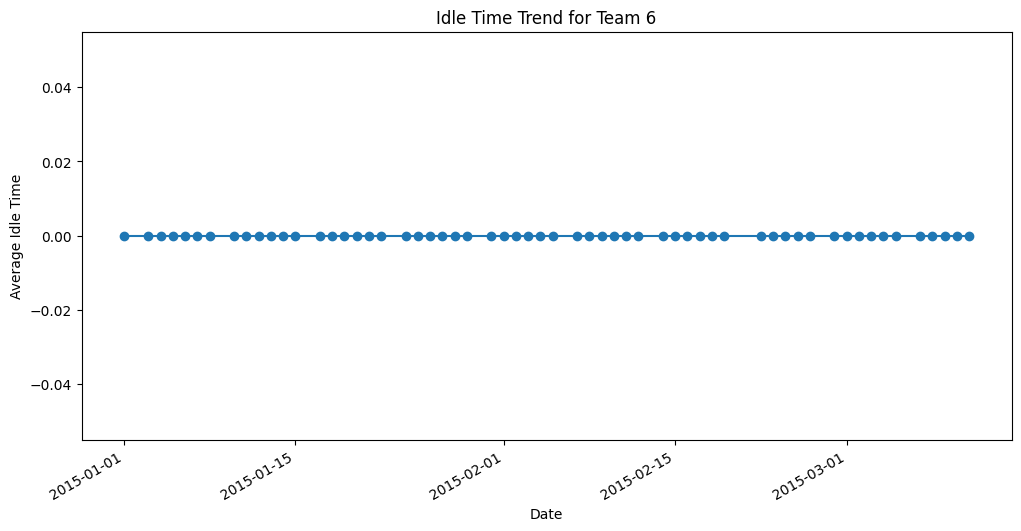

In [ ]:
team_6_data.groupby('date')['idle_time'].mean().plot(
    kind='line', figsize=(12, 6), title="Idle Time Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Idle Time")
plt.show()

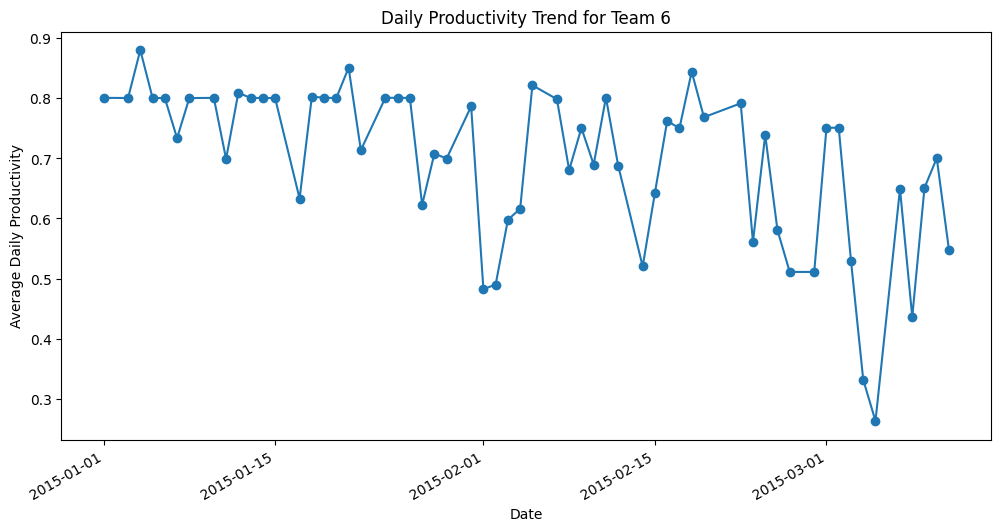

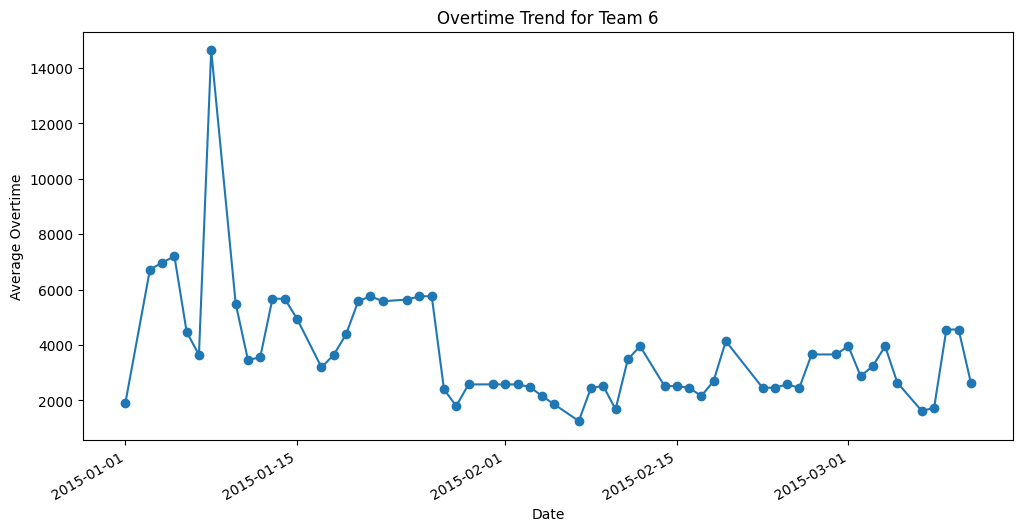

In [ ]:
# Filtering data for Team 6
team_6_data = data[data['team'] == 6]

team_6_data.groupby('date')['actual_productivity'].median().plot(
    kind='line', figsize=(12, 6), title="Daily Productivity Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Daily Productivity")
plt.show()

team_6_data.groupby('date')['over_time'].mean().plot(
    kind='line', figsize=(12, 6), title="Overtime Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Overtime")
plt.show()

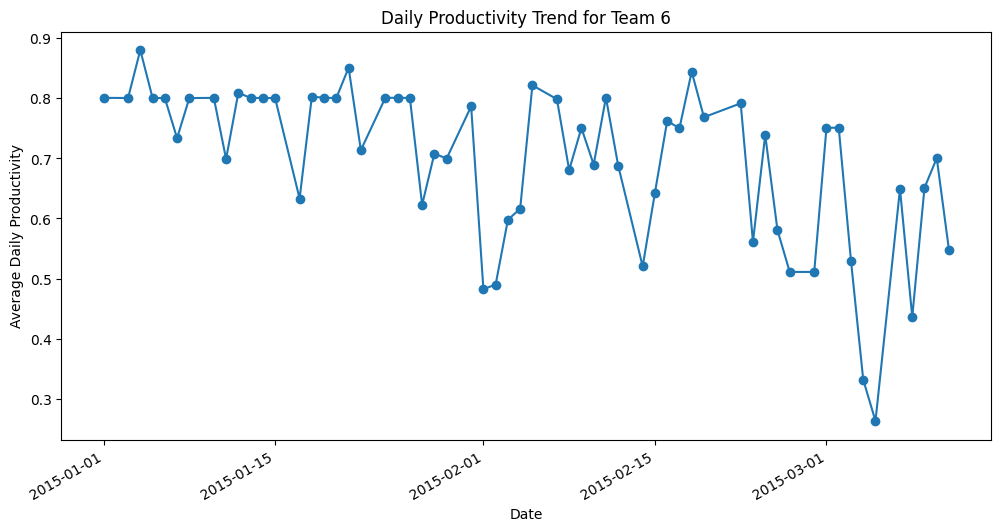

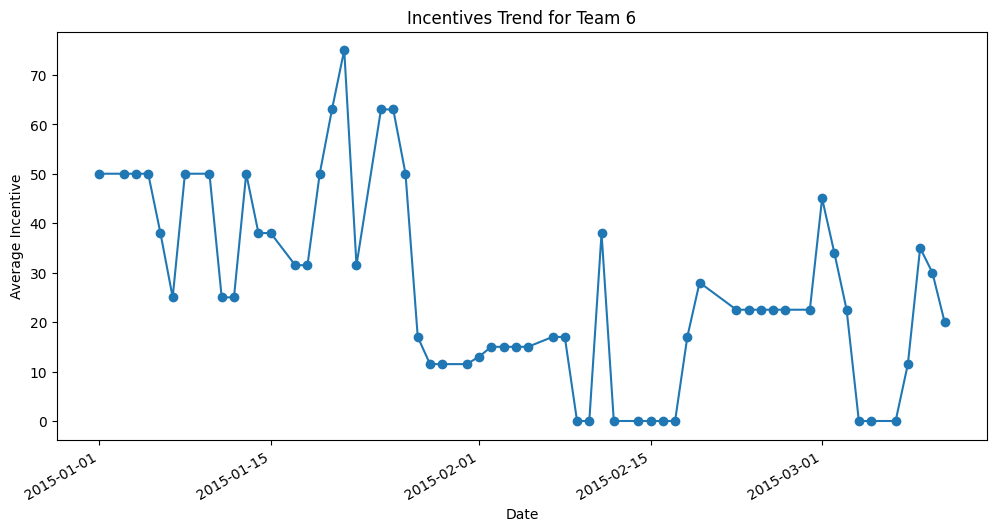

In [ ]:
# Filtering data for Team 6
team_6_data = data[data['team'] == 6]

team_6_data.groupby('date')['actual_productivity'].median().plot(
    kind='line', figsize=(12, 6), title="Daily Productivity Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Daily Productivity")
plt.show()

#Incentives: Examine whether a lack of incentives might be impacting motivation and productivity.
team_6_data.groupby('date')['incentive'].mean().plot(
    kind='line', figsize=(12, 6), title="Incentives Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Incentive")
plt.show()


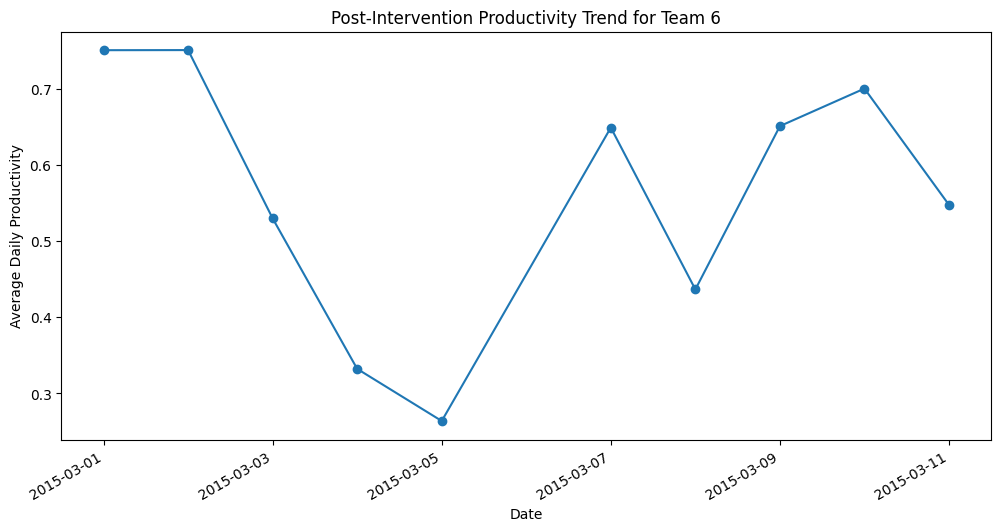

In [ ]:
# Monitoring post-intervention trend
team_6_data_after = team_6_data[team_6_data['date'] >= '2015-03-01']  # Assuming March 1, 2015, as intervention date
team_6_data_after.groupby('date')['actual_productivity'].mean().plot(
    kind='line', figsize=(12, 6), title="Post-Intervention Productivity Trend for Team 6", marker='o'
)
plt.xlabel("Date")
plt.ylabel("Average Daily Productivity")
plt.show()

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500,0.136500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,1028.5,960,0,0.0,0,0,8.0,0.628333,-0.121667
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625,-0.074375
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625,-0.024375
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1028.5,1800,0,0.0,0,0,15.0,0.505889,-0.244111


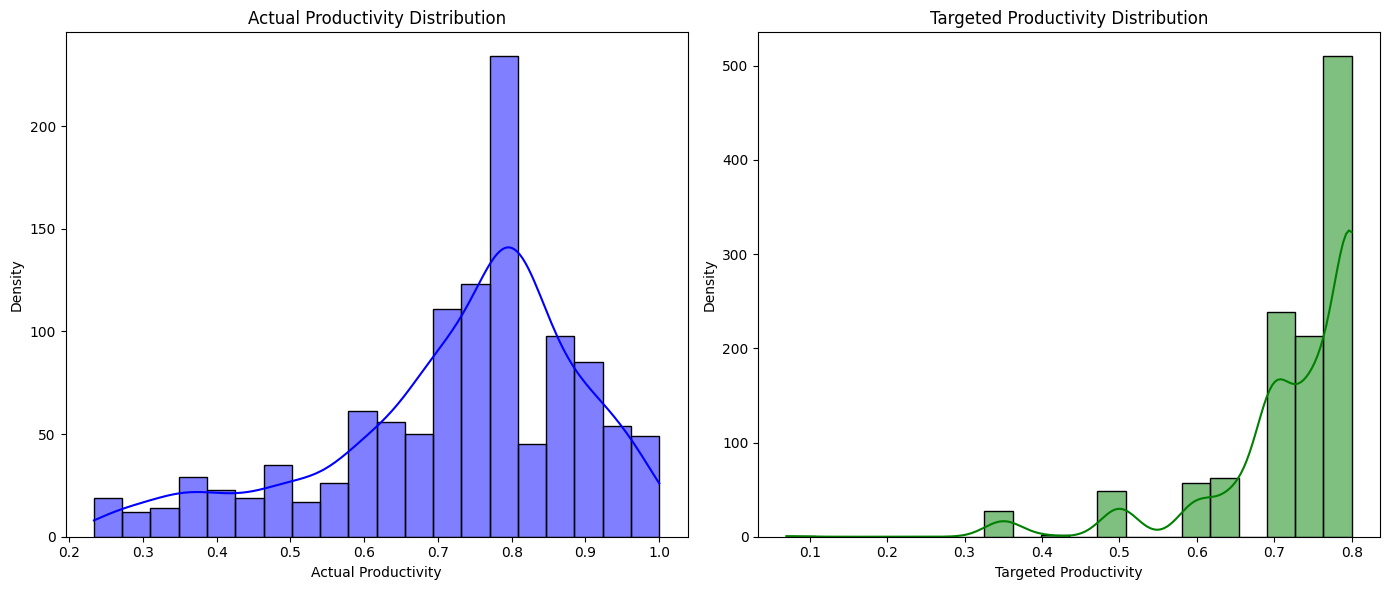

In [ ]:

plt.figure(figsize=(14, 6))

#Actual Productivity
plt.subplot(1, 2, 1)
sns.histplot(data['actual_productivity'], kde=True, color='blue', bins=20)
plt.title('Actual Productivity Distribution')
plt.xlabel('Actual Productivity')
plt.ylabel('Density')

# Targeted Productivity
plt.subplot(1, 2, 2)
sns.histplot(data['targeted_productivity'], kde=True, color='green', bins=20)
plt.title('Targeted Productivity Distribution')
plt.xlabel('Targeted Productivity')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,diff
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1028.5,960,0,0.0,0,0,8.0,0.886500,0.136500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,1028.5,960,0,0.0,0,0,8.0,0.628333,-0.121667
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625,-0.074375
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,1028.5,960,0,0.0,0,0,8.0,0.625625,-0.024375
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1028.5,1800,0,0.0,0,0,15.0,0.505889,-0.244111


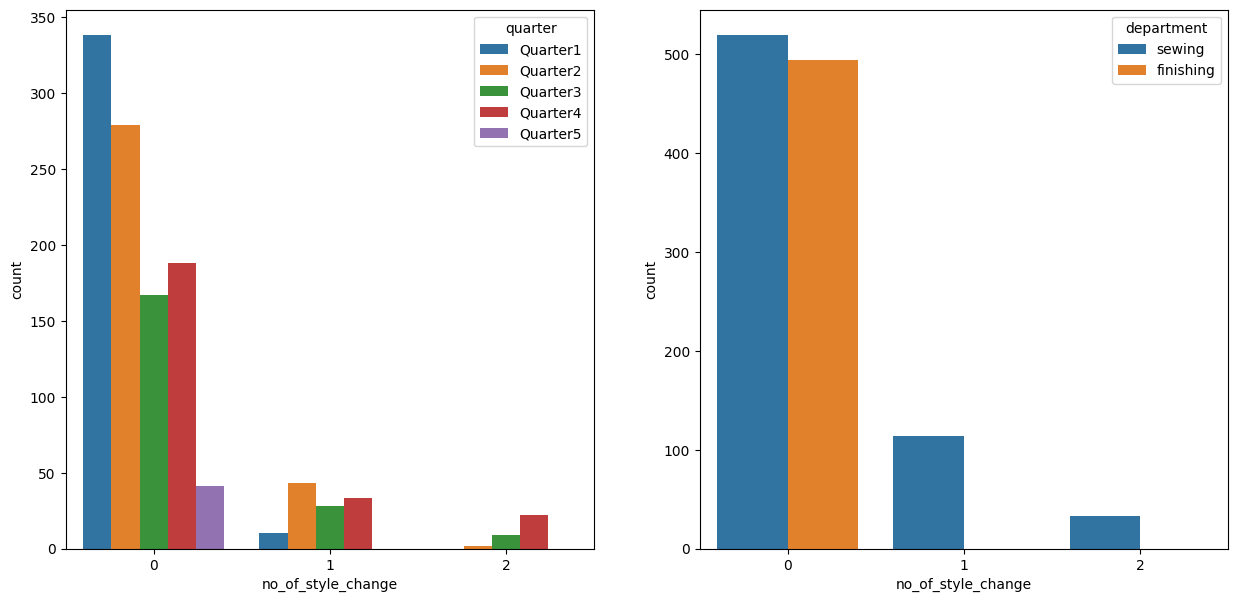

In [ ]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 2, 1)
sns.countplot(x = 'no_of_style_change',hue='quarter',data=data)
plt.xlabel('no_of_style_change')

plt.subplot(1, 2, 2)
sns.countplot(x = 'no_of_style_change',hue='department',data=data)
plt.xlabel('no_of_style_change')

plt.show()

**There is no no_of_style_change in Quarter5 and all of changes occured in the sewing department**

Quarterly Differences: There are differences in the number of style changes between quarters. This may be due to factors such as seasonality, new product launches, or changes in production planning.

Departmental Differences: More style changes in the sewing department may mean that this department has a greater variety of products or needs to adapt to design changes more frequently.

Frequency of Style Changes: Most observations show 0 or 1 style changes. This indicates that there are not a large number of style changes made during the production process, but there is still some variation.

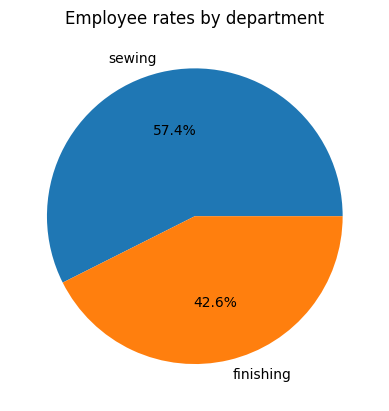

In [ ]:
datagrouping = data['department'].value_counts()
datagrouping.plot.pie(title="Employee rates by department", autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

In [ ]:
categorical_values = data.select_dtypes(include=['object'])
categorical_values

,quarter,department,day
0,Quarter1,sewing,Thursday
1,Quarter1,finishing,Thursday
2,Quarter1,sewing,Thursday
3,Quarter1,sewing,Thursday
4,Quarter1,sewing,Thursday
...,...,...,...
1192,Quarter2,finishing,Wednesday
1193,Quarter2,finishing,Wednesday
1194,Quarter2,finishing,Wednesday
1195,Quarter2,finishing,Wednesday


<Axes: >

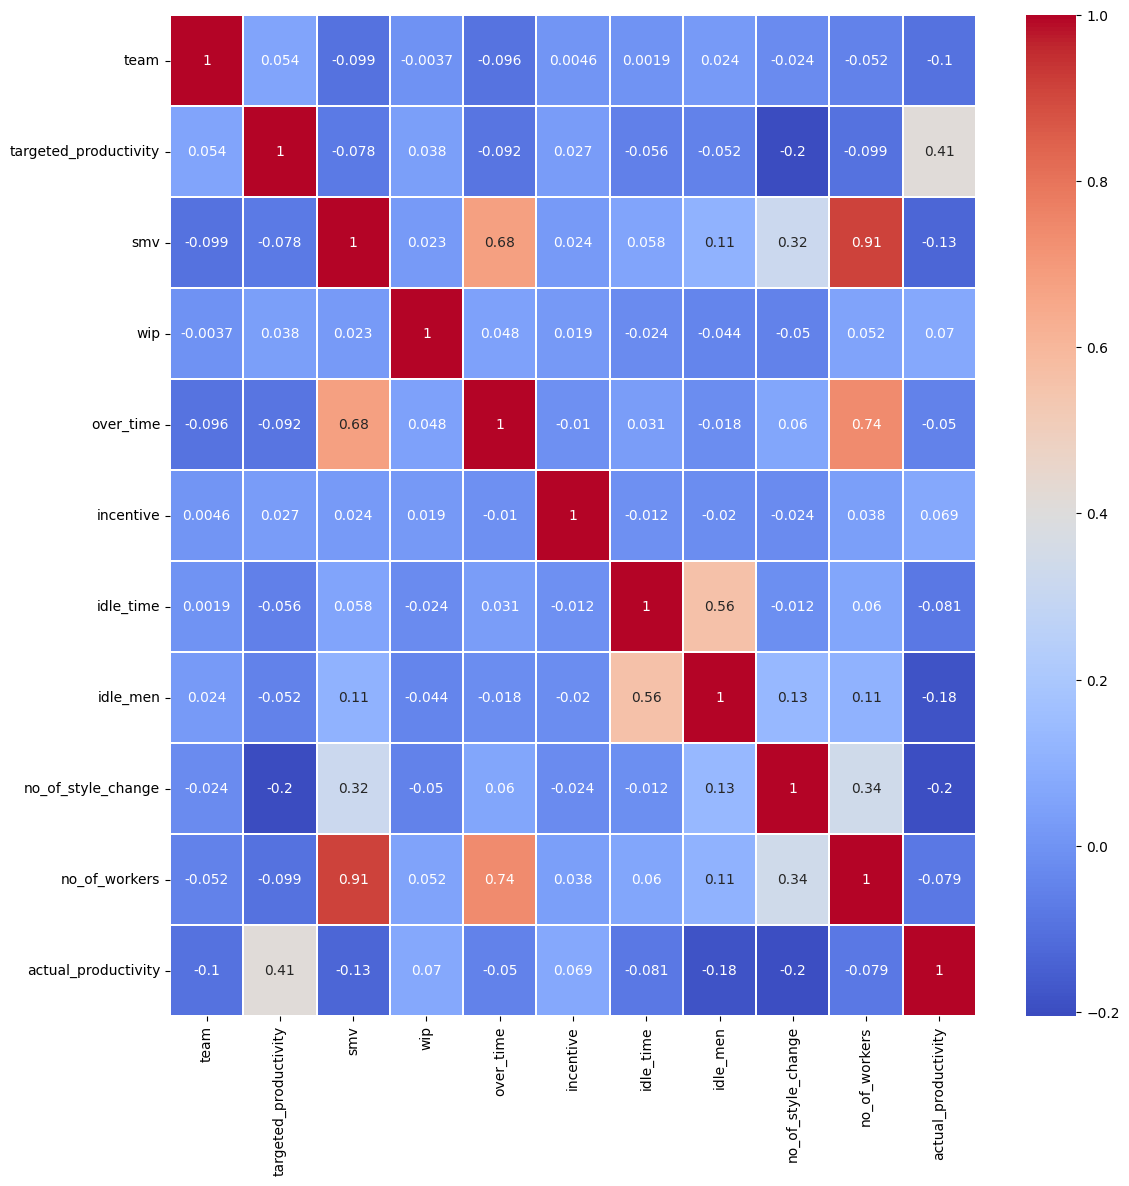

In [ ]:
#.corr()
corr_data = numerical_values.corr()
plt.figure(figsize = (13,13))
sns.heatmap(corr_data, cmap = 'coolwarm', linewidths=0.07, annot=True)

Highest Positive Correlations:

* No_of workers and smv (0.91)
* No_of workers and over_time (0.74)
* Over_time and smv (0.68)
* Idle_men and Idle_time (0.56)

Positive Correlations:

* No_of workers and no_of_style_change(0.34)
* No_of_style_change and smv (0.32)


# Feature Engineering

**One-hot Encoding**

* Quarter(categorical)
* department(categorical)
* day(categorical)
* team(it seems numerical but it is categorical)
* no_of_style_change (includes only 3 unique values.)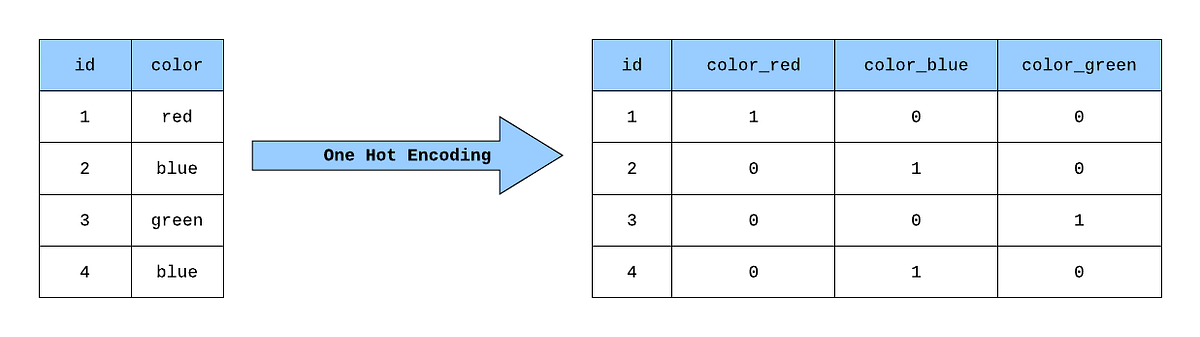

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

data = create_dummies(data,"quarter")
data = create_dummies(data,"department")
data = create_dummies(data,"day")
data = create_dummies(data,"team")

data.columns


Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'diff',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

# **Label Encoding¶**



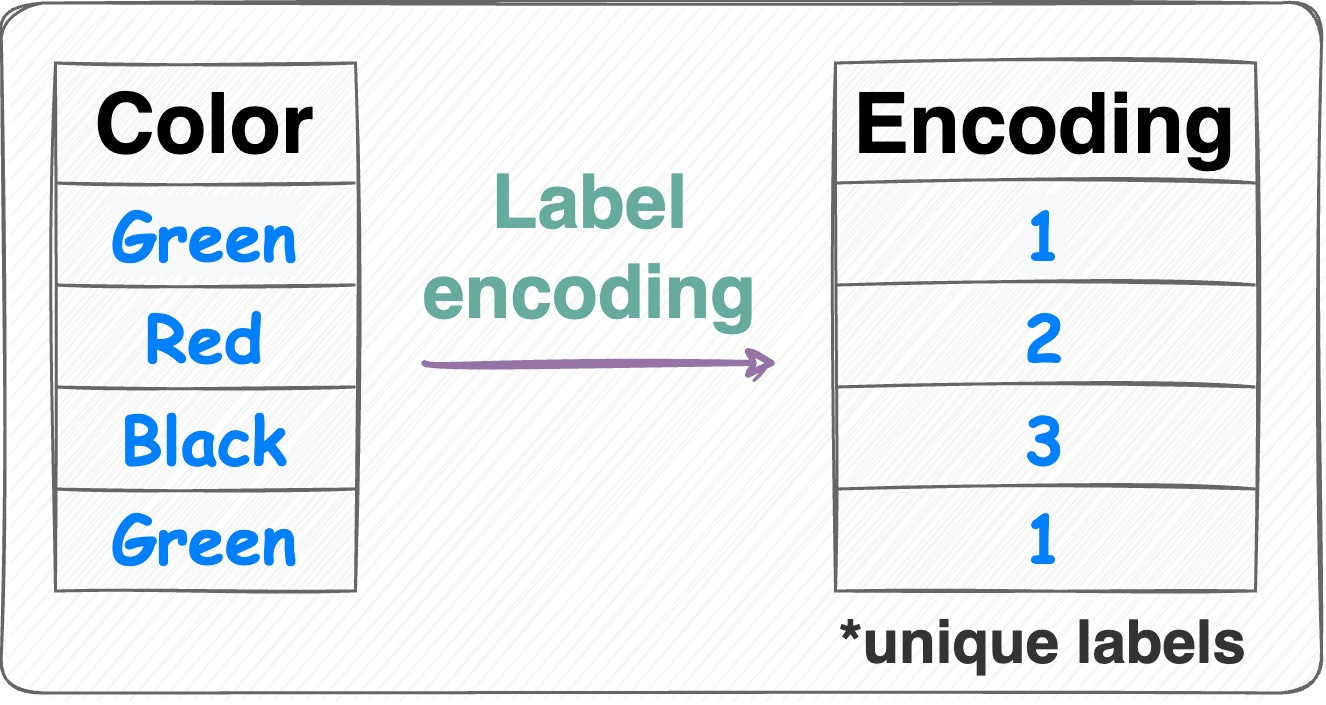



In [ ]:
le = LabelEncoder()
data["encoded_no_of_style_change"] = le.fit_transform(data["no_of_style_change"])
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,encoded_no_of_style_change
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,...,False,False,False,False,True,False,False,False,False,0
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1028.5,960,0,...,False,False,False,False,False,False,False,False,False,0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,...,False,False,False,False,False,False,False,True,False,0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,...,False,False,False,False,False,False,False,False,True,0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,...,False,False,True,False,False,False,False,False,False,0


In [ ]:
def classify_target_label(row):
    if row['diff'] < 0:
        return -1  #productivity is below target
    elif row['diff'] == 0: #productivity equals target
        return 0
    else:
        return 1 #productivity is above target

In [ ]:
data['Target'] = data.apply(classify_target_label, axis=1)


In [ ]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,encoded_no_of_style_change,Target
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,...,False,False,False,True,False,False,False,False,0,1
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1028.5,960,0,...,False,False,False,False,False,False,False,False,0,1
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,...,False,False,False,False,False,False,True,False,0,1
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,...,False,False,False,False,False,False,False,True,0,1
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,...,False,True,False,False,False,False,False,False,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 0 to 1196
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1160 non-null   datetime64[ns]
 1   quarter                     1160 non-null   object        
 2   department                  1160 non-null   object        
 3   day                         1160 non-null   object        
 4   team                        1160 non-null   int64         
 5   targeted_productivity       1160 non-null   float64       
 6   smv                         1160 non-null   float64       
 7   wip                         1160 non-null   float64       
 8   over_time                   1160 non-null   int64         
 9   incentive                   1160 non-null   int64         
 10  idle_time                   1160 non-null   float64       
 11  idle_men                    1160 non-null   int64         
 1

In [ ]:
data1=data.copy()


<ipython-input-102-4a53239f1628>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Target', data = data1, palette='Set1')


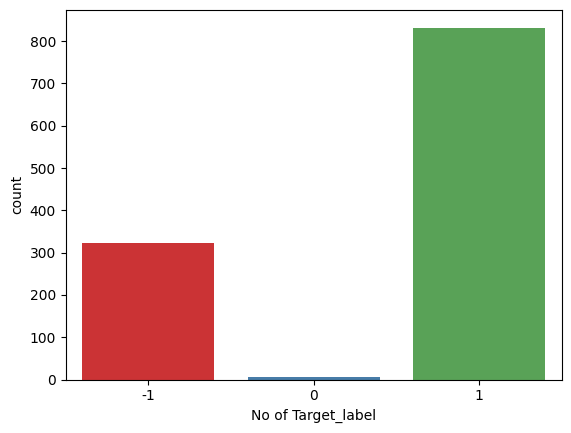

In [ ]:
ax = sns.countplot(x = 'Target', data = data1, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [ ]:
data1 = data1.drop(columns=['quarter', 'department', 'day', 'team'])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


New Class Distr.:
Target
 1    832
 0    832
-1    322
Name: count, dtype: int64


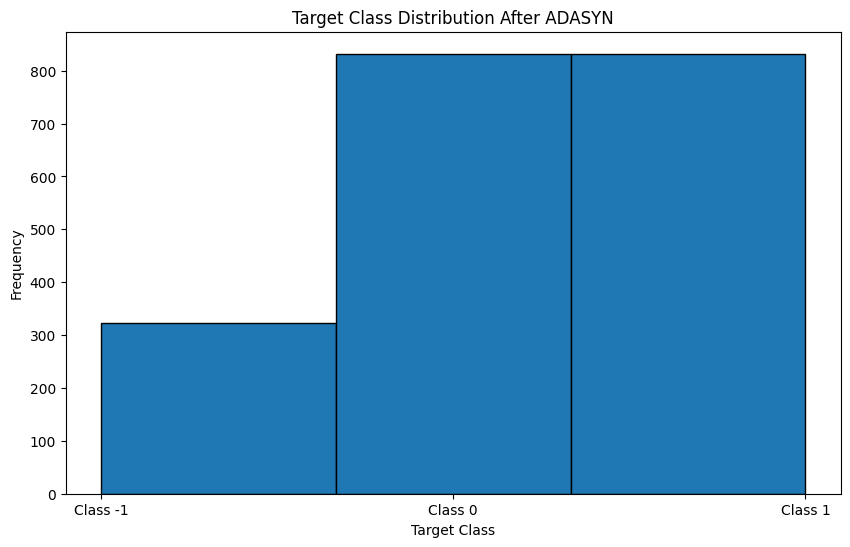

In [ ]:
#In order for our Date type data to be suitable for the modeling process:data1['year'] = data1['date'].dt.year
data1['month'] = data1['date'].dt.month
data1['day'] = data1['date'].dt.day

#we have date informations so this column unnecessary
data1 = data1.drop(columns=['date'])



# After making the data suitable for ADASYN, we run it again
X = data1.drop('Target', axis=1)  # independent features
y = data1['Target']  # Target Variable

# Create ADASYN model
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)


X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Checking the class distribution of the new data
print(f'New Class Distr.:\n{y_adasyn.value_counts()}')


plt.figure(figsize=(10, 6))
plt.hist(y_adasyn, bins=3, edgecolor='black')
plt.title('Target Class Distribution After ADASYN')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([-1, 0, 1], ['Class -1', 'Class 0', 'Class 1'])
plt.show()




>  We used the ADASYN (Adaptive Synthetic Sampling) method to cope with the class imbalance problem. We balanced the imbalance between classes by ensuring that the minority class in the dataset is replicated. ADASYN allows the model to make better predictions on the minority class, especially by increasing the number of minority classes. In this step, we applied it to the X and y datasets and balanced our data with ADASYN.



In [ ]:
y_adasyn.shape, X_adasyn.shape

((1986,), (1986, 39))

In [ ]:
data1.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'diff', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sewing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'encoded_no_of_style_change', 'Target', 'month', 'day'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

independentColumns = ['smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_workers', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sewing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'team_1', 'team_2', 'team_3', 'team_4', 'team_5',
       'team_6', 'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'encoded_no_of_style_change']

X = data[independentColumns]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)



> During the modeling process, we realized that "Target" column should not be in the X dataset and the diff column already represents the difference between actual_productivity and targeted_productivity, so we left out the actual_productivity and targeted_productivity columns. Also, the new columns resulting from the one-hot encoding of categorical variables were included in the model, so the original categorical variables (quarter, department, day, team) were not in X. Thus, we created our model with only independent variables.



In [ ]:
X_train.shape, y_train.shape

((928, 33), (928,))

In [ ]:
X_test.shape, y_test.shape

((232, 33), (232,))

In [ ]:
from sklearn.preprocessing import Normalizer
scalerProcess = Normalizer()
X_train = scalerProcess.fit_transform(X_train)
X_test = scalerProcess.transform(X_test)

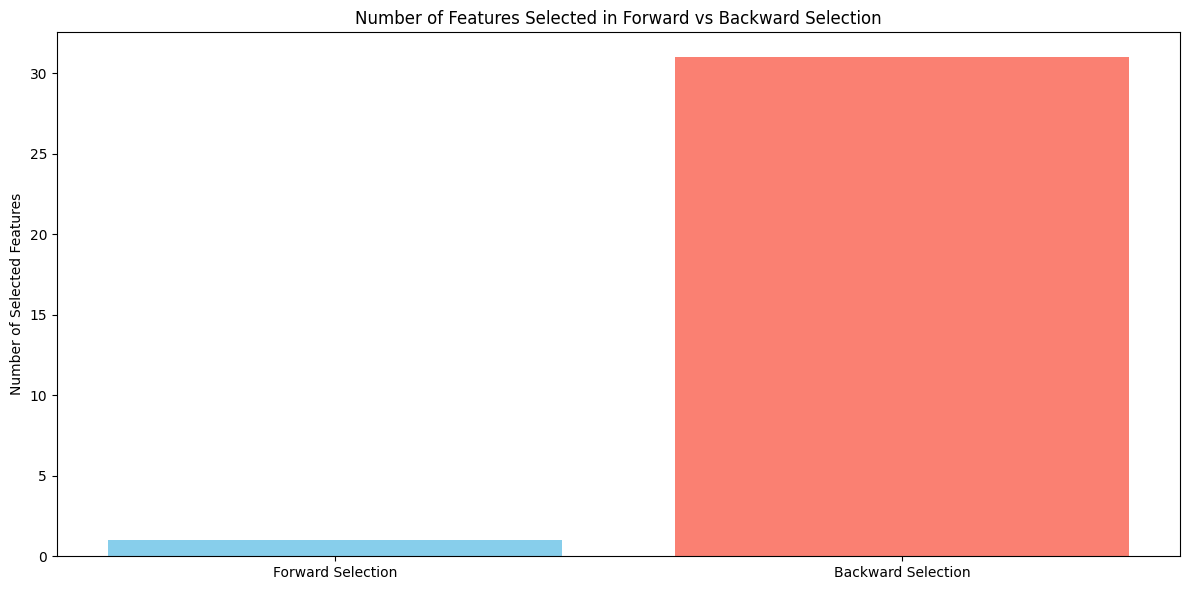

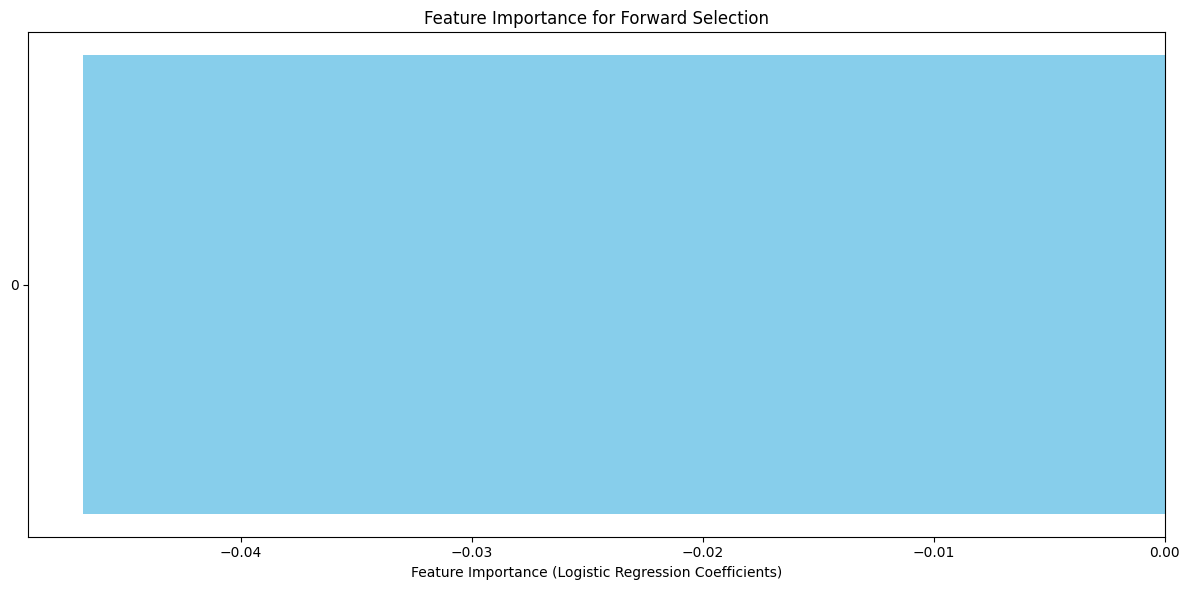

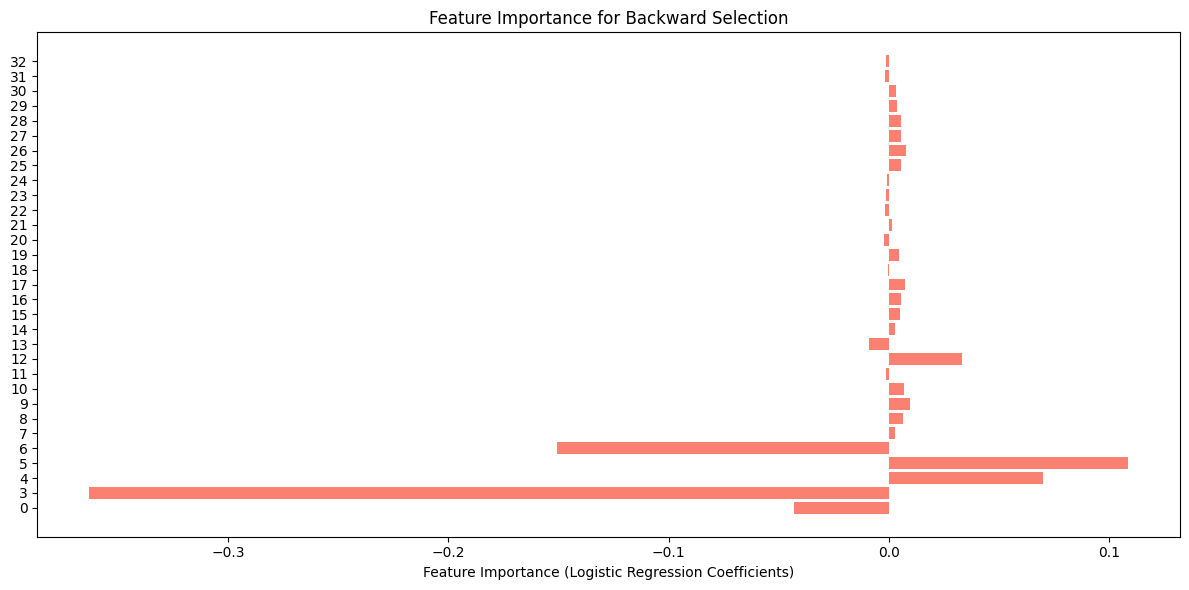


Comparison of Selection Methods (Table):
  Selection Method  Accuracy  Precision    Recall  F1 Score
0          Forward  0.728448   0.530637  0.728448  0.614004
1         Backward  0.728448   0.530637  0.728448  0.614004


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Forward selection
forward_selector = SFS(logreg,
                      k_features='best',
                      forward=True,
                      scoring='accuracy',
                      cv=5)
forward_selector = forward_selector.fit(X_train, y_train)
forward_selected_features = list(forward_selector.k_feature_names_)
forward_selected_indexes = list(forward_selector.k_feature_idx_)
X_train_forward = X_train[:, forward_selected_indexes]
X_test_forward = X_test[:, forward_selected_indexes]

logreg.fit(X_train_forward, y_train)
y_pred_forward = logreg.predict(X_test_forward)

accuracy_forward = accuracy_score(y_test, y_pred_forward)
precision_forward = precision_score(y_test, y_pred_forward, average='weighted', zero_division=0)
recall_forward = recall_score(y_test, y_pred_forward, average='weighted')
f1_forward = f1_score(y_test, y_pred_forward, average='weighted')

# Backward selection
backward_selector = SFS(logreg,
                       k_features='best',
                       forward=False,
                       scoring='accuracy',
                       cv=5)
backward_selector = backward_selector.fit(X_train, y_train)
backward_selected_features = list(backward_selector.k_feature_names_)
backward_selected_indexes = list(backward_selector.k_feature_idx_)
X_train_backward = X_train[:, backward_selected_indexes]
X_test_backward = X_test[:, backward_selected_indexes]

logreg.fit(X_train_backward, y_train)
y_pred_backward = logreg.predict(X_test_backward)

accuracy_backward = accuracy_score(y_test, y_pred_backward)
precision_backward = precision_score(y_test, y_pred_backward, average='weighted', zero_division=0)
recall_backward = recall_score(y_test, y_pred_backward, average='weighted')
f1_backward = f1_score(y_test, y_pred_backward, average='weighted')

# Plot the number of selected features
plt.figure(figsize=(12, 6))
plt.bar(["Forward Selection", "Backward Selection"],
        [len(forward_selected_features), len(backward_selected_features)],
        color=['skyblue', 'salmon'])
plt.ylabel('Number of Selected Features')
plt.title('Number of Features Selected in Forward vs Backward Selection')
plt.tight_layout()
plt.show()

# Visualizing the feature importance based on model coefficients
# For Forward Selection
logreg.fit(X_train_forward, y_train)
forward_feature_importance = logreg.coef_[0]

# For Backward Selection
logreg.fit(X_train_backward, y_train)
backward_feature_importance = logreg.coef_[0]

# Plotting feature importance for Forward Selection
plt.figure(figsize=(12, 6))
plt.barh(forward_selected_features, forward_feature_importance, color='skyblue')
plt.xlabel('Feature Importance (Logistic Regression Coefficients)')
plt.title('Feature Importance for Forward Selection')
plt.tight_layout()
plt.show()

# Plotting feature importance for Backward Selection
plt.figure(figsize=(12, 6))
plt.barh(backward_selected_features, backward_feature_importance, color='salmon')
plt.xlabel('Feature Importance (Logistic Regression Coefficients)')
plt.title('Feature Importance for Backward Selection')
plt.tight_layout()
plt.show()

# Results table
results_logreg = pd.DataFrame({
    'Selection Method': ["Forward", "Backward"],
    'Accuracy': [accuracy_forward, accuracy_backward],
    'Precision': [precision_forward, precision_backward],
    'Recall': [recall_forward, recall_backward],
    'F1 Score': [f1_forward, f1_backward]
})

print("\nComparison of Selection Methods (Table):")
print(results_logreg)

Forward Selection Performance: {'Accuracy': 0.7198275862068966, 'Precision': 0.7269779968337208, 'Recall': 0.7198275862068966, 'F1 Score': 0.723070991496893}
Backward Selection Performance: {'Accuracy': 0.7586206896551724, 'Precision': 0.7610730793055798, 'Recall': 0.7586206896551724, 'F1 Score': 0.7597880747126438}


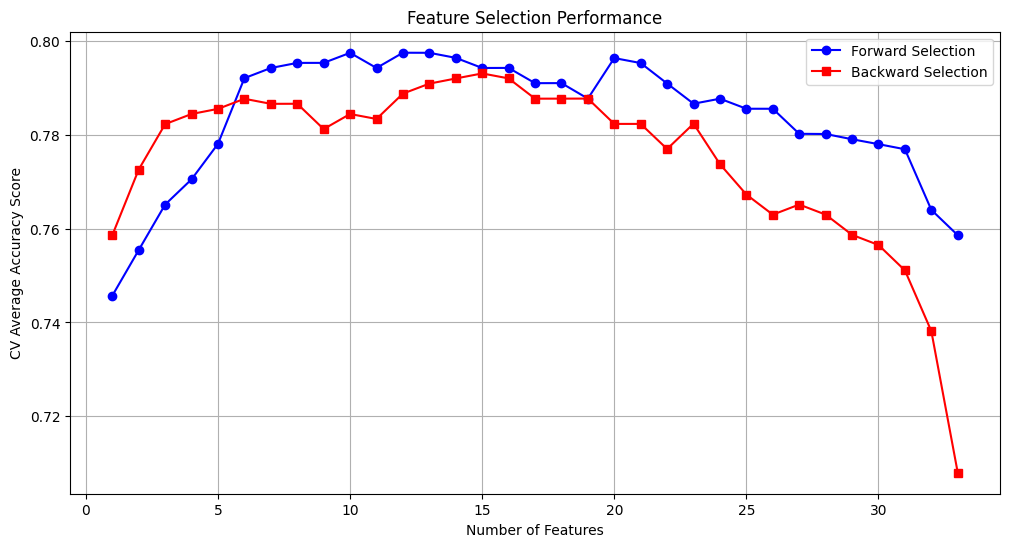

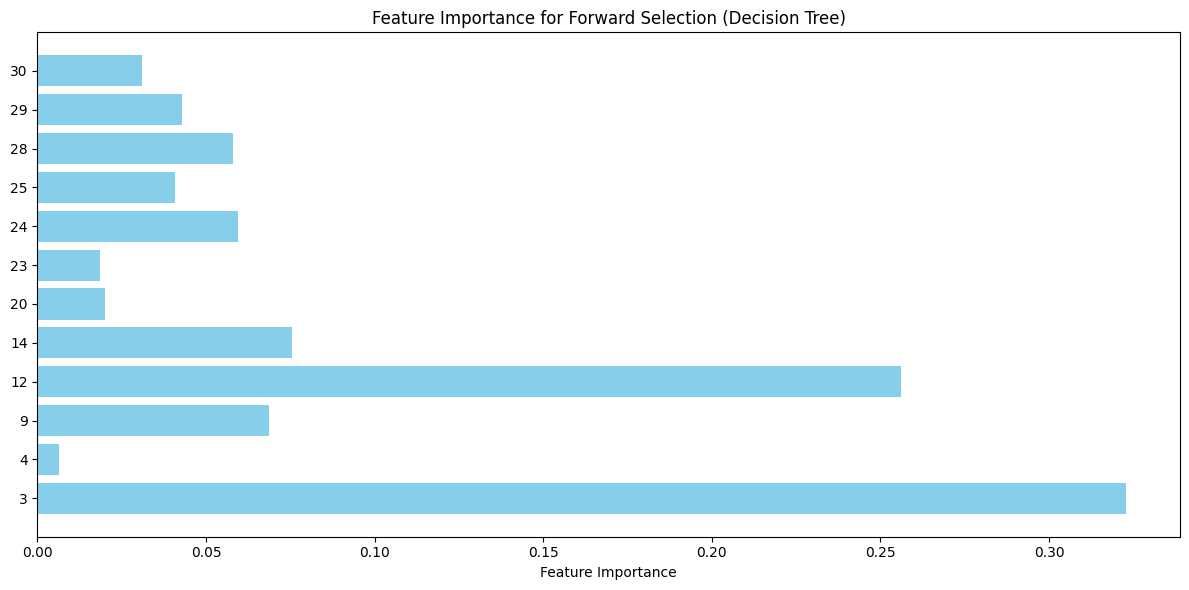

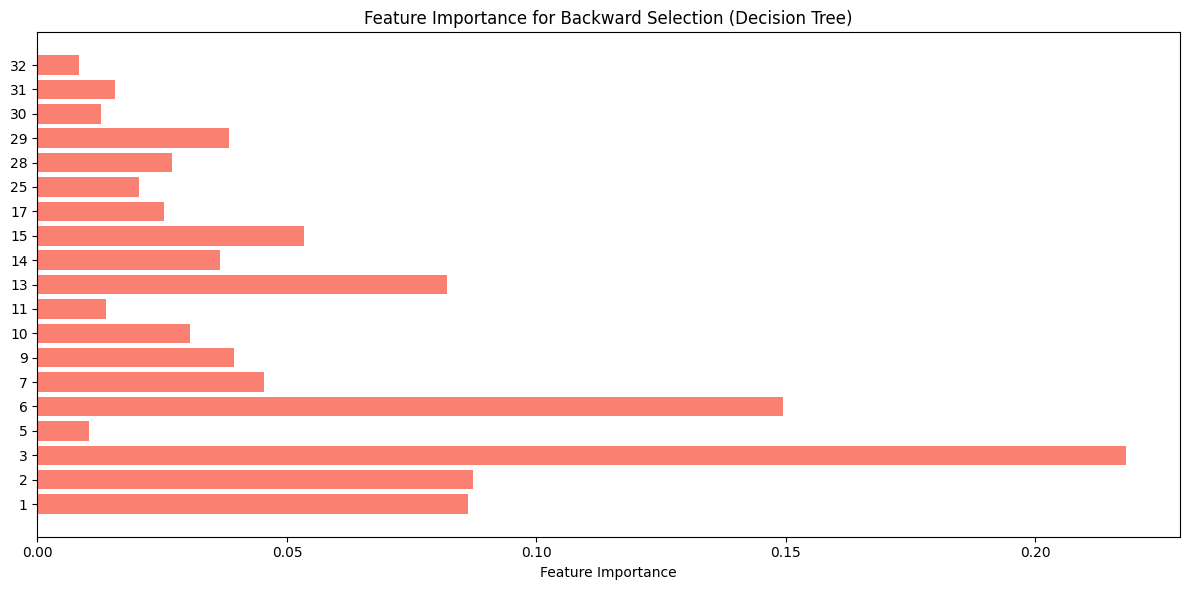


Forward and Backward Selection Results:
                                     Forward Features  Forward Scores  \
0                                department_finishing        0.745702   
1                     incentive, department_finishing        0.755426   
2            incentive, department_finishing, team_11        0.765121   
3    incentive, department_finishing, team_9, team_11        0.770497   
4   incentive, department_finishing, day_Monday, t...        0.778053   
5   incentive, department_finishing, day_Monday, t...        0.792049   
6   incentive, department_finishing, day_Monday, t...        0.794211   
7   incentive, idle_time, department_finishing, da...        0.795298   
8   incentive, idle_time, department_finishing, da...        0.795304   
9   incentive, idle_time, department_finishing, da...        0.797443   
10  incentive, idle_time, quarter_Quarter3, depart...        0.794217   
11  incentive, idle_time, quarter_Quarter3, depart...        0.797466   
12  incent

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Forward selection
forward_selector = SFS(decision_tree,
                       k_features='best',
                       forward=True,
                       scoring='accuracy',
                       cv=5)
forward_selector = forward_selector.fit(X_train, y_train)

# Save information about selected features
selected_features_forward = list(forward_selector.k_feature_names_)
selected_indexes_forward = list(forward_selector.k_feature_idx_)

# Train the model with the selected features and measure the performance
X_train_forward = X_train[:, selected_indexes_forward]
X_test_forward = X_test[:, selected_indexes_forward]

decision_tree.fit(X_train_forward, y_train)
y_pred_forward = decision_tree.predict(X_test_forward)

metrics_forward = {
    'Accuracy': accuracy_score(y_test, y_pred_forward),
    'Precision': precision_score(y_test, y_pred_forward, average='weighted'),
    'Recall': recall_score(y_test, y_pred_forward, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_forward, average='weighted')
}

# Backward selection
backward_selector = SFS(decision_tree,
                        k_features='best',
                        forward=False,
                        scoring='accuracy',
                        cv=5)
backward_selector = backward_selector.fit(X_train, y_train)

# Save information about selected features
selected_features_backward = list(backward_selector.k_feature_names_)
selected_indexes_backward = list(backward_selector.k_feature_idx_)

X_train_backward = X_train[:, selected_indexes_backward]
X_test_backward = X_test[:, selected_indexes_backward]

decision_tree.fit(X_train_backward, y_train)
y_pred_backward = decision_tree.predict(X_test_backward)

metrics_backward = {
    'Accuracy': accuracy_score(y_test, y_pred_backward),
    'Precision': precision_score(y_test, y_pred_backward, average='weighted'),
    'Recall': recall_score(y_test, y_pred_backward, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_backward, average='weighted')
}

# Compare Performance Results
print("Forward Selection Performance:", metrics_forward)
print("Backward Selection Performance:", metrics_backward)

# Visualize Forward and Backward selection processes
forward_scores = [subset['avg_score'] for subset in forward_selector.subsets_.values()]
backward_scores = [subset['avg_score'] for subset in backward_selector.subsets_.values()]

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(forward_scores) + 1), forward_scores, label='Forward Selection', marker='o', color='blue')
plt.plot(range(1, len(backward_scores) + 1), backward_scores, label='Backward Selection', marker='s', color='red')
plt.xlabel('Number of Features')
plt.ylabel('CV Average Accuracy Score')
plt.title('Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance Visualization for Forward Selection
decision_tree.fit(X_train_forward, y_train)
forward_importance = decision_tree.feature_importances_

# Feature Importance Visualization for Backward Selection
decision_tree.fit(X_train_backward, y_train)
backward_importance = decision_tree.feature_importances_

# Plotting Feature Importance for Forward Selection
plt.figure(figsize=(12, 6))
plt.barh(selected_features_forward, forward_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Forward Selection (Decision Tree)')
plt.tight_layout()
plt.show()

# Plotting Feature Importance for Backward Selection
plt.figure(figsize=(12, 6))
plt.barh(selected_features_backward, backward_importance, color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Backward Selection (Decision Tree)')
plt.tight_layout()
plt.show()

# Tabloyu oluştur
forward_features = [', '.join([independentColumns[i] for i in subset['feature_idx']]) for subset in forward_selector.subsets_.values()]
backward_features = [', '.join([independentColumns[i] for i in subset['feature_idx']]) for subset in backward_selector.subsets_.values()]

results_df = pd.DataFrame({
    'Forward Features': forward_features + [''] * (len(backward_features) - len(forward_features)),
    'Forward Scores': forward_scores + [None] * (len(backward_features) - len(forward_scores)),
    'Backward Features': backward_features + [''] * (len(forward_features) - len(backward_features)),
    'Backward Scores': backward_scores + [None] * (len(forward_features) - len(backward_scores))
})

print("\nForward and Backward Selection Results:")
print(results_df)

# Extract metrics for the Decision Tree models
accuracy_forward_dt = metrics_forward['Accuracy']
precision_forward_dt = metrics_forward['Precision']
recall_forward_dt = metrics_forward['Recall']
f1_forward_dt = metrics_forward['F1 Score']

accuracy_backward_dt = metrics_backward['Accuracy']
precision_backward_dt = metrics_backward['Precision']
recall_backward_dt = metrics_backward['Recall']
f1_backward_dt = metrics_backward['F1 Score']

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


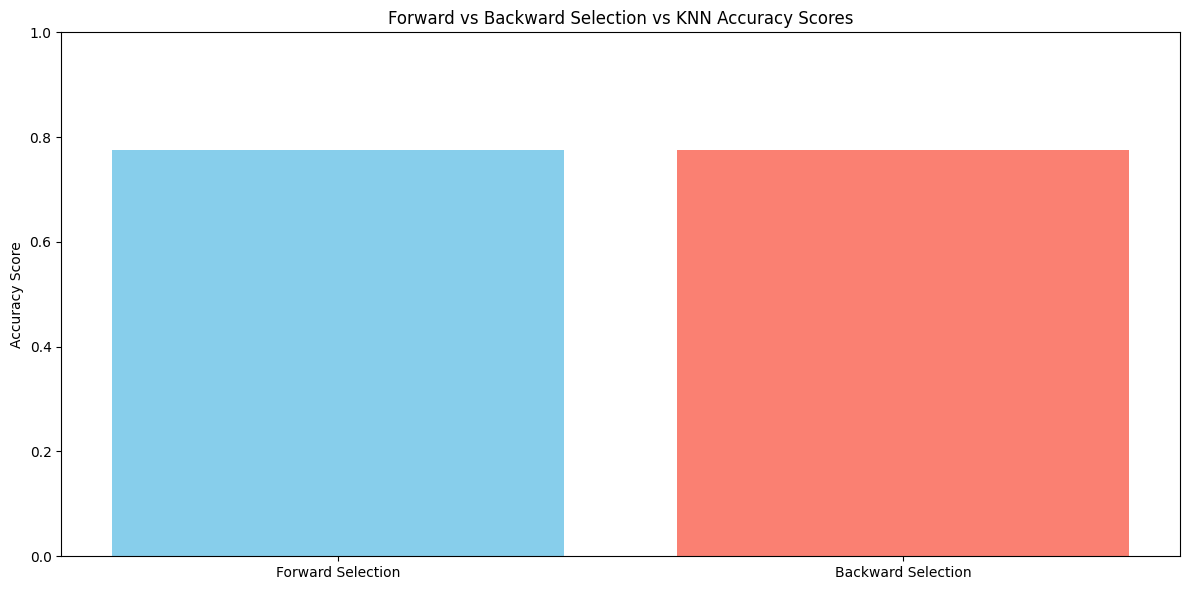


Model and Selection Method Comparison (Table):
  Model/Selection Method  Accuracy  Precision    Recall  F1 Score
0          Forward (KNN)  0.775862   0.758900  0.775862  0.754729
1         Backward (KNN)  0.775862   0.770931  0.775862  0.772154


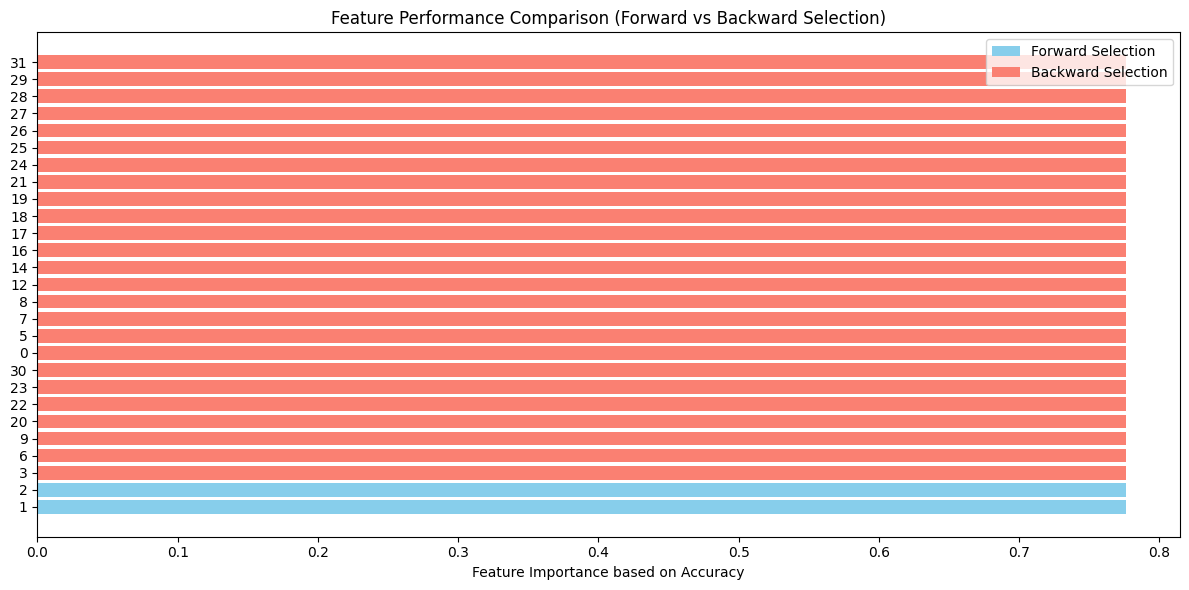

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Model for Forward and Backward Selection
knn = KNeighborsClassifier()

# Forward Selection for KNN
forward_selector_knn = SFS(knn,
                           k_features='best',
                           forward=True,
                           scoring='accuracy',
                           cv=5)

forward_selector_knn = forward_selector_knn.fit(X_train, y_train)

forward_selected_features_knn = list(forward_selector_knn.k_feature_names_)
forward_selected_indexes_knn = list(forward_selector_knn.k_feature_idx_)
X_train_forward_knn = X_train[:, forward_selected_indexes_knn]
X_test_forward_knn = X_test[:, forward_selected_indexes_knn]

knn.fit(X_train_forward_knn, y_train)
y_pred_forward_knn = knn.predict(X_test_forward_knn)

accuracy_forward_knn = accuracy_score(y_test, y_pred_forward_knn)
precision_forward_knn = precision_score(y_test, y_pred_forward_knn, average='weighted', zero_division=1)
recall_forward_knn = recall_score(y_test, y_pred_forward_knn, average='weighted')
f1_forward_knn = f1_score(y_test, y_pred_forward_knn, average='weighted')

# Backward Selection for KNN
backward_selector_knn = SFS(knn,
                            k_features='best',
                            forward=False,
                            scoring='accuracy',
                            cv=5)

backward_selector_knn = backward_selector_knn.fit(X_train, y_train)

backward_selected_features_knn = list(backward_selector_knn.k_feature_names_)
backward_selected_indexes_knn = list(backward_selector_knn.k_feature_idx_)
X_train_backward_knn = X_train[:, backward_selected_indexes_knn]
X_test_backward_knn = X_test[:, backward_selected_indexes_knn]

knn.fit(X_train_backward_knn, y_train)
y_pred_backward_knn = knn.predict(X_test_backward_knn)

accuracy_backward_knn = accuracy_score(y_test, y_pred_backward_knn)
precision_backward_knn = precision_score(y_test, y_pred_backward_knn, average='weighted', zero_division=1)
recall_backward_knn = recall_score(y_test, y_pred_backward_knn, average='weighted')
f1_backward_knn = f1_score(y_test, y_pred_backward_knn, average='weighted')

# Visualize accuracy scores of forward vs backward selections
plt.figure(figsize=(12, 6))
plt.bar(["Forward Selection", "Backward Selection"],
        [accuracy_forward_knn, accuracy_backward_knn],
        color=['skyblue', 'salmon'])
plt.ylabel('Accuracy Score')
plt.title('Forward vs Backward Selection vs KNN Accuracy Scores')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Results comparison in a DataFrame
results_knn = pd.DataFrame({
    'Model/Selection Method': ["Forward (KNN)", "Backward (KNN)"],
    'Accuracy': [accuracy_forward_knn, accuracy_backward_knn],
    'Precision': [precision_forward_knn, precision_backward_knn],
    'Recall': [recall_forward_knn, recall_backward_knn],
    'F1 Score': [f1_forward_knn, f1_backward_knn]
})
print("\nModel and Selection Method Comparison (Table):")
print(results_knn)

# Visualization of feature performance comparison
# Create a plot showing performance based on selected features
plt.figure(figsize=(12, 6))
plt.barh(forward_selected_features_knn, accuracy_forward_knn*np.ones(len(forward_selected_features_knn)), color='skyblue', label='Forward Selection')
plt.barh(backward_selected_features_knn, accuracy_backward_knn*np.ones(len(backward_selected_features_knn)), color='salmon', label='Backward Selection')
plt.xlabel('Feature Importance based on Accuracy')
plt.title('Feature Performance Comparison (Forward vs Backward Selection)')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Sonuçlar için DataFrame
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Forward)", "Logistic Regression (Backward)", "Decision Tree (Forward)",
        "Decision Tree (Backward)", "K-Nearest Neighbors (Forward)",
        "K-Nearest Neighbors (Backward)"
    ],
    "Accuracy_Train": [
        accuracy_forward,  # Logistic Regression Forward
        accuracy_backward,  # Logistic Regression Backward
        accuracy_forward_dt,  # Decision Tree Forward
        accuracy_backward_dt,  # Decision Tree Backward

        accuracy_forward_knn,  # KNN Forward
        accuracy_backward_knn   # KNN Backward
    ],
    "Accuracy_Test": [
        accuracy_forward,  # Logistic Regression Forward Test
        accuracy_backward,  # Logistic Regression Backward Test
        accuracy_forward_dt,  # Decision Tree Forward Test
        accuracy_backward_dt,  # Decision Tree Backward Test

        accuracy_forward_knn,  # KNN Forward Test
        accuracy_backward_knn   # KNN Backward Test
    ],
    "Precision": [
        precision_forward,  # Logistic Regression Forward Precision
        precision_backward,  # Logistic Regression Backward Precision
        precision_forward_dt,  # Decision Tree Forward Precision
        precision_backward_dt,  # Decision Tree Backward Precision

        precision_forward_knn,  # KNN Forward Precision
        precision_backward_knn   # KNN Backward Precision
    ],
    "Recall": [
        recall_forward,  # Logistic Regression Forward Recall
        recall_backward,  # Logistic Regression Backward Recall
        recall_forward_dt,  # Decision Tree Forward Recall
        recall_backward_dt,  # Decision Tree Backward Recall

        recall_forward_knn,  # KNN Forward Recall
        recall_backward_knn   # KNN Backward Recall
    ],
    "F1_Score": [
        f1_forward,  # Logistic Regression Forward F1 Score
        f1_backward,  # Logistic Regression Backward F1 Score
        f1_forward_dt,  # Decision Tree Forward F1 Score
        f1_backward_dt,  # Decision Tree Backward F1 Score

        f1_forward_knn,  # KNN Forward F1 Score
        f1_backward_knn   # KNN Backward F1 Score
    ]
})

# Sonuçları görüntüle
results


,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1_Score
0,Logistic Regression (Forward),0.728448,0.728448,0.530637,0.728448,0.614004
1,Logistic Regression (Backward),0.728448,0.728448,0.530637,0.728448,0.614004
2,Decision Tree (Forward),0.719828,0.719828,0.726978,0.719828,0.723071
3,Decision Tree (Backward),0.758621,0.758621,0.761073,0.758621,0.759788
4,K-Nearest Neighbors (Forward),0.775862,0.775862,0.758900,0.775862,0.754729
5,K-Nearest Neighbors (Backward),0.775862,0.775862,0.770931,0.775862,0.772154
